In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [3]:
import pycalphad.core.equilibrium
%time eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (1e-4, 1-1e-4, 0.01), v.T: 1300, v.P: [101325]}, verbose=True)
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4 B2_BCC FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [820 points, 82.1KB]
Computing convex hull [iteration 1]
progress 2.68116174282e+172 [100 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 1 [AL13FE4]
N-R convergence on mini-iteration 1 [AL5FE4]
N-R convergence on mini-iteration 1 [FCC_A1]
N-R convergence on mini-iteration 1 [HCP_A3]
N-R convergence on mini-iteration 1 [LIQUID]
Rebuilding grid [2020 points, 202.1KB]
Computing convex hull [iteration 2]
progress 19225.4533699 [91 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 1 [AL13FE4]
N-R convergence on mini-iteration 1 [AL5FE4]
N-R convergence on mini-iteration 1 [FCC_A1]
N-R convergence on mini-iteration 1 [HCP_A3]
N-R convergence on mini-iteration 1 [LIQUID]
Rebuilding grid [3220 points, 322.1KB]
Computing convex hull [iteration 3]
progress 4217.23779608 [62 conditions updated]
Refining convex hull
N-R convergence 

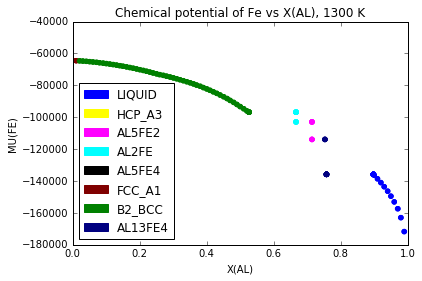

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1300 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=1300, vertex=0).values[0]]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=0), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=1300, vertex=1).values[0]]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=1), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')